# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [108]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [5]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [82]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

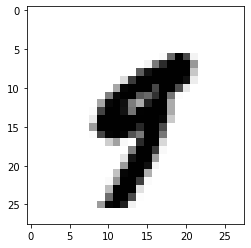

In [83]:

plt.imshow(X[36000].reshape(28,28), cmap= plt.cm.binary, interpolation="nearest")

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [84]:
y[36000]

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [47]:
X_train = X[0:60000]
X_test = X[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [69]:
y_binary = np.where(y == '5', 1, 0)

In [70]:
y_train = y_binary[0:60000]
y_test = y_binary[60000:]

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [114]:
LogisticReg = LogisticRegression()
LogisticReg.fit(X_train,y_train)
predictions = LogisticReg.predict(X_test)

C:\Users\jaume\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 36000th digit we picked before?

In [79]:
LogisticReg.predict(X_train[[35999]])

array([0])

In [ ]:
#Yes it does predict that this number is not a 5

#### The 35th value is a 5. Check if it was correctly predicted.

In [81]:
LogisticReg.predict(X_train[[35]])

array([1])

In [ ]:
# Yes it does predict is a 5!

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [85]:
# Libraries
from sklearn.base import BaseEstimator

In [90]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [125]:
never_5_clf.fit(X_test,y_test)
never_5_clf.predict(X_test[[500]])
predictions_no5 = never_5_clf.predict(X_test)

In [93]:
y_test[500]

0

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [97]:
score_LR_train = LogisticReg.score(X_train,y_train)
score_LR_test = LogisticReg.score(X_test,y_test)
score_LR_test

0.9774

In [128]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[9027   81]
 [ 145  747]]


In [129]:
cm_no5 = metrics.confusion_matrix(y_test,predictions_no5)
print(cm_no5)

[[9108    0]
 [ 892    0]]


In [124]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1_score = 2 * ((precision * recall) / (precision + recall))
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1 Score:{f1_score}')

Precision:0.9021739130434783
Recall:0.8374439461883408
F1 Score:0.8686046511627907


In [130]:
precision_no5 = precision_score(y_test, predictions_no5)
recall_no5 = recall_score(y_test, predictions_no5)
f1_score_no5 = 2 * ((precision_no5 * recall_no5) / (precision_no5 + recall_no5))
print(f'Precision:{precision_no5}')
print(f'Recall:{recall_no5}')
print(f'F1 Score:{f1_score_no5}')

Precision:0.0
Recall:0.0
F1 Score:nan


C:\Users\jaume\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# The dummy one is only finding True and False Negatives, which means is not running correctly (or accurately).
# The Logistic Regresion one is running pretty well, having high values in all of the metrics.

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

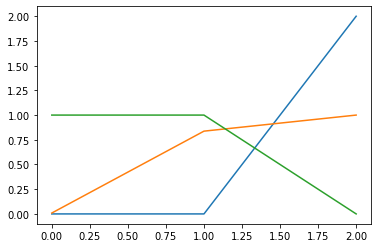

In [134]:
plt.plot(metrics.roc_curve(y_test,predictions))

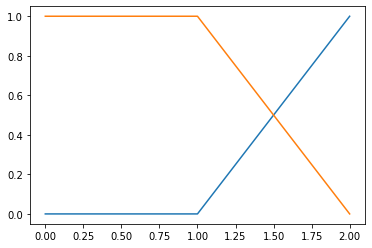

In [133]:
plt.plot(metrics.roc_curve(y_test,predictions_no5))

#### Now find the roc_auc_score for each. 

In [135]:
metrics.roc_auc_score(y_test,predictions_no5)

0.5

In [136]:
metrics.roc_auc_score(y_test,predictions)

0.914275332777965

#### What does this metric tell you? Which classifier works better with this metric in mind?

The AUC number is interpretable as the percentage chance that the model will correctly distinguish between the classesyour answer here. In this case, for the Logistic Regression model the value is very high while for the Dummy one it is just 0.5 which means that the algorithm is doing slightly better than for random chance.